### Sanity checks:

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, gc
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *
gc.enable()

In [2]:
gc.collect();

In [3]:
T = 100
I = 10    # number of locations
J = 5    # number of species
K = 3    # number of latent factors

In [4]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [5]:
n_particles = 1000
alpha_grad, lmbda_grad, c_grad, phi_grad, logsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax=T, Imax=I, Jmax=J, Kmax=K, rep=500)

In [6]:
np.mean(alpha_grad,0)

array([[-1.5662818 , 16.34826565, -6.52233871, 16.75976315,  5.19323186],
       [-6.19359107, 23.36082572, -4.59158449, 21.57583521,  8.68506089]])

In [7]:
np.var(alpha_grad,0)

array([[ 14.50002484,   8.96450095,  11.2405416 ,   7.15099823,
         11.31325209],
       [126.4916809 ,  82.51373262, 112.01409825,  63.07797421,
        107.02187384]])

In [8]:
np.round(np.var(alpha_grad,0)[1]/np.var(alpha_grad,0)[0],1)

array([ 8.7,  9.2, 10. ,  8.8,  9.5])

In [9]:
np.mean(lmbda_grad,0)

array([[[ 1.27561870e+00,  3.04267840e+00,  4.55274728e+00],
        [ 4.16948298e+00,  6.85142525e+00,  2.27979325e-02],
        [-4.15054799e+00, -4.47908497e+00,  2.33020242e+00],
        [-1.53050712e+00,  4.07375007e+00,  1.65984512e-01],
        [ 3.80936042e+00, -3.16617779e+00, -2.36721504e+00]],

       [[ 2.90296827e+01,  1.78637231e+01,  6.98755572e+01],
        [-2.31975870e+01, -1.12043738e+01, -1.96143306e-01],
        [-3.72734121e+01,  1.06980401e+01,  2.42018198e+01],
        [-1.44816793e+01,  4.21024508e+01, -2.44947277e+01],
        [-1.59815117e+01,  5.36373670e+01, -1.23030803e+01]]])

In [10]:
np.var(lmbda_grad,0)

array([[[ 23.5897224 ,  23.41089242,  18.36010146],
        [ 11.91572078,  17.06317248,  20.37099264],
        [ 11.10674967,  20.71713508,  18.8738299 ],
        [ 23.68719188,  21.23667231,  32.62195752],
        [ 25.95282061,  19.53632763,  26.54260302]],

       [[175.70831781, 179.84427842, 158.83440523],
        [ 98.13060185, 148.87197969, 146.7910036 ],
        [ 85.88373915, 175.82865073, 136.85263973],
        [184.22114826, 172.11544343, 189.7176481 ],
        [194.76665146, 165.13672372, 195.78281073]]])

In [11]:
np.round(np.var(lmbda_grad,0)[1]/np.var(lmbda_grad,0)[0],1)

array([[7.4, 7.7, 8.7],
       [8.2, 8.7, 7.2],
       [7.7, 8.5, 7.3],
       [7.8, 8.1, 5.8],
       [7.5, 8.5, 7.4]])

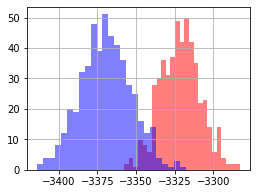

In [12]:
fig = plt.rcParams['figure.figsize'] = (4, 3)
plt.hist(logNC[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logNC[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True);

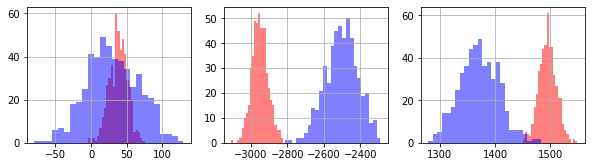

In [13]:
fig = plt.rcParams['figure.figsize'] = (10, 2.5)
plt.subplot(131)
plt.hist(c_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(c_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(132)
plt.hist(phi_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(phi_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(133)
plt.hist(logsigmasq_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logsigmasq_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)

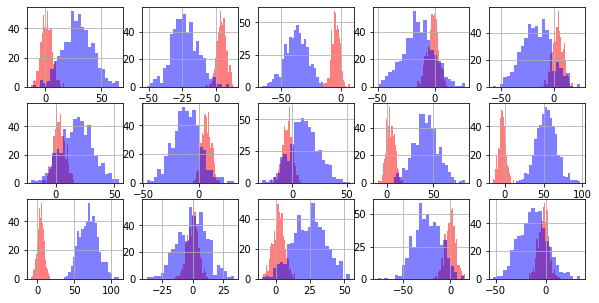

In [14]:
fig = plt.rcParams['figure.figsize'] = (10, 5)
for k in range(K) :
    for j in range(J) :
        idx = k*J + j + 1
        plt.subplot(K,J,idx)
        plt.hist(lmbda_grad[:,0,j,k], bins=25, alpha=0.5, color="red")
        plt.hist(lmbda_grad[:,1,j,k], bins=25, alpha=0.5, color="blue")
        plt.grid(True)